In [1]:
library("tidyverse")
library("reshape")
library(ggbeeswarm)
library("tidyr")
library("ggplot2")
library("reshape2")
library("dplyr")
theme_set(theme_bw(base_size = 18)) 

options(repr.matrix.max.rows=200, repr.matrix.max.cols=200)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   0.3.5 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape'


The following object is masked from 'package:dplyr':

    rename


The following objects are masked from 'package:tidyr':

    expand, smiths



Attaching package: 'reshape2'


The following objects are masked from 'package:reshape':

    colsplit, melt, recast


The following object is masked from 'package:tidyr':

    smiths




In [2]:
data = read.delim("/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Filteration/NTD_WES_DNM.sampFil.PF2.Insp.pu.Binom0.05.v2.den_input", header = T)
dim(data)
head(data)





[1] 3663  119

,locus,ref,alt,family,pro,dad,mom,pro_sex,pro_DP,pro_ref,pro_alt,pro_GT,pro_GQ,dad_DP,dad_ref,dad_alt,dad_GT,dad_GQ,mom_DP,mom_ref,mom_alt,mom_GT,mom_GQ,p_denovo,confidence,MQ,QD,filter,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,UNIPROT_ISOFORM,GENE_PHENO,SIFT,PolyPhen,DOMAINS,miRNA,HGVS_OFFSET,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,MAX_AF,MAX_AF_POPS,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,CADD_phred,DisGeNET,MPC,MTR,Mastermind,MetaSVM_pred,MetaSVM_rankscore,Phenotypes,Polyphen2_HDIV_score,SIFT_pred,SplicAI,SpliceRegion,gnomAD_exomes_AC,gnomAD_exomes_AF,gnomAD_exomes_AN,pLI,pLI_values,occurence,probands,DP_filter12,pval,Inspected
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<lgl>,<dbl>,<int>
1,chr1:930088,C,A,7795,6295869718,4188565559,1220884191,0,105,61,44,0/1,99,36,36,0,0/0,75,37,37,0,0/0,75,.,hiConfDeNovo,60.00,11.29,PASS,A,intron_variant,MODIFIER,SAMD11,ENSG00000187634,Transcript,ENST00000622503,protein_coding,,1/12,ENST00000622503.5:c.73-67C>A,,,,,,,,NA,1,cds_start_NF,SNV,HGNC,HGNC:28706,,,,5,,,ENSP00000482138,,A0A087WYW1.42,UPI0004E4CA1D,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,1,6295869718,TRUE,0.11799998,NA
2,chr1:976670,G,A,263,S13333,S13335,S13334,1,36,22,14,0/1,99,25,25,0,0/0,30,34,34,0,0/0,99,.,hiConfDeNovo,60.29,13.78,PASS,A,intron_variant,MODIFIER,PERM1,ENSG00000187642,Transcript,ENST00000694917,protein_coding,,2/3,ENST00000694917.1:c.2150-46C>T,,,,,,,rs1013715150,NA,-1,,SNV,HGNC,HGNC:28208,,,,NA,P2,CCDS76083.1,ENSP00000511592,,,UPI0003E30FA7,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.378e-05,0,0.000e+00,0,0,0,3.754e-05,0.0000000,0,3.754e-05,gnomAD_NFE,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,2,S13333/S12830,TRUE,0.24298495,NA
3,chr1:980676,G,A,7094,3644259853,4433008742,4615441495,2,53,23,30,0/1,99,54,54,0,0/0,95,45,45,0,0/0,74,.,hiConfDeNovo,60.00,16.18,PASS,A,synonymous_variant,LOW,PERM1,ENSG00000187642,Transcript,ENST00000694917,protein_coding,2/4,,ENST00000694917.1:c.354C>T,ENSP00000511592.1:p.Gly118%3D,425,354,118,G,ggC/ggT,rs748787280,NA,-1,,SNV,HGNC,HGNC:28208,,,,NA,P2,CCDS76083.1,ENSP00000511592,,,UPI0003E30FA7,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2.877e-04,0,2.396e-04,0,0,0,5.434e-04,0.0005574,0,5.574e-04,gnomAD_OTH,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,1,3644259853,TRUE,0.41010272,NA
4,chr1:1290349,G,A,12111,12111.s1,12111.fa,12111.mo,2,33,19,14,0/1,99,40,40,0,0/0,76,40,40,0,0/0,67,.,hiConfDeNovo,60.00,11.4,PASS,A,downstream_gene_variant,MODIFIER,ACAP3,ENSG00000131584,Transcript,ENST00000492936,retained_intron,,,,,,,,,,,2041,-1,,SNV,HGNC,HGNC:16754,,,,1,,,,,,,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,1,12111.s1,TRUE,0.48685024,NA
5,chr1:1294823,G,A,11138,11138.s1,11138.fa,11138.mo,1,26,10,16,0/1,99,29,29,0,0/0,49,25,25,0,0/0,49,.,hiConfDeNovo,60.

In [3]:
# PLI scores
oe = read.delim('gnomad.v2.1.1.lof_metrics.by_gene.txt')
colnames(oe)[1] = "SYMBOL"
dim(oe)
oe = oe[!duplicated(oe$SYMBOL), ]
head(oe)
oe$gene = factor(oe$SYMBOL, levels=oe$SYMBOL)
oe = oe[, c(1,10,21,22,23,24,29,30)]
oe_unique <- unique(oe)

data <- left_join(data, batch, by = "pro")
#data <- merge(data, unique(batch[,c("pro", "batch")]), by = "pro", all = TRUE, sort =FALSE)
dim(data)

##add pli
dim(data)
data <- left_join(data, oe_unique, by= 'SYMBOL')

[1] 19704    77

,SYMBOL,transcript,obs_mis,exp_mis,oe_mis,mu_mis,possible_mis,obs_mis_pphen,exp_mis_pphen,oe_mis_pphen,possible_mis_pphen,obs_syn,exp_syn,oe_syn,mu_syn,possible_syn,obs_lof,mu_lof,possible_lof,exp_lof,pLI,pNull,pRec,oe_lof,oe_syn_lower,oe_syn_upper,oe_mis_lower,oe_mis_upper,oe_lof_lower,oe_lof_upper,constraint_flag,syn_z,mis_z,lof_z,oe_lof_upper_rank,oe_lof_upper_bin,oe_lof_upper_bin_6,n_sites,classic_caf,max_af,no_lofs,obs_het_lof,obs_hom_lof,defined,p,exp_hom_lof,classic_caf_afr,classic_caf_amr,classic_caf_asj,classic_caf_eas,classic_caf_fin,classic_caf_nfe,classic_caf_oth,classic_caf_sas,p_afr,p_amr,p_asj,p_eas,p_fin,p_nfe,p_oth,p_sas,transcript_type,gene_id,transcript_level,cds_length,num_coding_exons,gene_type,gene_length,exac_pLI,exac_obs_lof,exac_exp_lof,exac_oe_lof,brain_expression,chromosome,start_position,end_position
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<int>
1,MED13,ENST00000397786,871,1117.80,0.77921,5.5598e-05,14195,314,529.75,0.59273,6708,422,387.53,1.0890,1.9097e-05,4248,0,4.9203e-06,1257,98.429,1,8.9436e-40,1.8383e-16,0.0000000,1.005,1.180,0.736,0.824,0.000,0.030,,-1.376500,2.6232,9.1935,0,0,0,2,1.2058e-05,8.0492e-06,124782,3,0,124785,1.2021e-05,1.8031e-05,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,9.2812e-05,8.8571e-06,0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,9.276e-05,8.8276e-06,0,0.0000e+00,protein_coding,ENSG00000108510,2,6522,30,protein_coding,122678,1,0,64.393,0.0000000,NA,17,60019966,60142643
2,NIPBL,ENST00000282516,846,1441.50,0.58688,7.3808e-05,18540,158,543.10,0.29092,7135,496,495.01,1.0020,2.4942e-05,5211,1,9.4214e-06,1781,150.320,1,2.9773e-59,3.5724e-24,0.0066527,0.930,1.079,0.554,0.621,0.001,0.032,,-0.035119,5.5737,11.2860,1,0,0,2,1.1943e-05,7.9636e-06,125693,3,0,125696,1.1934e-05,1.7901e-05,0.0000e+00,0.0000e+00,9.9246e-05,0.0000e+00,0.0000e+00,0.0000e+00,0,6.5338e-05,0.0000e+00,0.0000e+00,9.9231e-05,0.0000e+00,0.000e+00,0.0000e+00,0,6.5327e-05,protein_coding,ENSG00000164190,2,8412,46,protein_coding,189655,1,1,110.570,0.0090443,NA,5,36876861,37066515
3,SMC3,ENST00000361804,178,630.07,0.28251,3.2489e-05,8109,21,182.52,0.11506,2197,215,203.25,1.0578,9.8016e-06,2091,0,4.5403e-06,937,79.490,1,2.7853e-32,2.1914e-13,0.0000000,0.946,1.184,0.249,0.320,0.000,0.037,,-0.647760,6.3999,8.2618,2,0,0,8,3.1885e-05,3.9986e-06,125731,8,0,125739,3.1812e-05,1.2725e-04,0.0000e+00,0.0000e+00,9.9364e-05,5.4366e-05,0.0000e+00,4.4068e-05,0,3.2673e-05,0.0000e+00,0.0000e+00,9.9211e-05,5.4367e-05,0.000e+00,4.3956e-05,0,3.2663e-05,protein_coding,ENSG00000108055,2,3651,29,protein_coding,36946,1,0,58.523,0.0000000,NA,10,112327449,112364394
4,CNOT1,ENST00000317147,561,1295.90,0.43290,6.9116e-05,15670,51,290.68,0.17545,3560,470,456.03,1.0306,2.3979e-05,4564,1,6.8100e-06,1440,125.030,1,2.9924e-49,4.5629e-20,0.0079978,0.955,1.112,0.403,0.464,0.002,0.038,,-0.514100,7.2546,10.2790,3,0,0,5,1.9952e-05,4.0200e-06,125740,4,0,125744,1.5905e-05,3.1811e-05,0.0000e+00,2.8915e-05,0.0000e+00,5.4645e-05,0.0000e+00,2.6416e-05,0,0.0000e+00,0.0000e+00,2.8909e-05,0.0000e+00,5.4367e-05,0.000e+00,1.7581e-05,0,0.0000e+00,protein_coding,ENSG00000125107,2,7128,48,protein_coding,109936,1,3,90.130,0.0332850,NA,16,58553855,58663790
5,RLF,ENST00000372771,669,972.87,0.68766,4.7052e-05,12682,107,321.14,0.33319,4151,358,352.62,1.0153,1.6694e-05,3482,0,4.0155e-06,1024,73.222,1,8.4055e-30,2.2842e-12,0.0000000,0.930,1.108,0.645,0.733,0.000,0.040,,-0.225180,3.4620,7.9294,4,0,0,1,3.9961e-06,3.9961e-06,125122,1,0,125123,3.9961e-06,1.9980e-06,6.1866e-05,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0,0.0000e+00,6.1868e-05,0.0000

[1] 3663  120

[1] 3663  120

In [4]:
#PED
ped = read.delim('20220919_NTD_WES_Trios.wH.ped', header=T)
colnames(ped)[1] = 'family'
colnames(ped)[2] = 'pro'
ped.pro = ped[ped[, 3] != 0 & ped[, 4] != 0, ] # proband only
colnames(ped.pro) = c('fid', 'pro', 'dad', 'mom', 'V5', 'V6')
head(ped.pro)
dim(ped.pro)
##Add batch info
data <- left_join(data, batch, by = "pro")
head(data)



,fid,pro,dad,mom,V5,V6
,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,101,S12816,S12818,S12817,1,2
4,103,S14383,S14384,S14385,2,2
7,103,S14386,S14384,S14385,1,2
10,11000,11000.s1,11000.fa,11000.mo,2,2
13,11002,11002.s1,11002.fa,11002.mo,1,2
16,11003,11003.s1,11003.fa,11003.mo,2,2


[1] 1541    6

,locus,ref,alt,family,pro,dad,mom,pro_sex,pro_DP,pro_ref,pro_alt,pro_GT,pro_GQ,dad_DP,dad_ref,dad_alt,dad_GT,dad_GQ,mom_DP,mom_ref,mom_alt,mom_GT,mom_GQ,p_denovo,confidence,MQ,QD,filter,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,UNIPROT_ISOFORM,GENE_PHENO,SIFT,PolyPhen,DOMAINS,miRNA,HGVS_OFFSET,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,MAX_AF,MAX_AF_POPS,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,CADD_phred,DisGeNET,MPC,MTR,Mastermind,MetaSVM_pred,MetaSVM_rankscore,Phenotypes,Polyphen2_HDIV_score,SIFT_pred,SplicAI,SpliceRegion,gnomAD_exomes_AC,gnomAD_exomes_AF,gnomAD_exomes_AN,pLI.x,pLI_values,occurence,probands,DP_filter12,pval,Inspected,batch.x,oe_mis_pphen,pLI.y,pNull,pRec,oe_lof,oe_lof_lower,oe_lof_upper,batch.y
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<lgl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1:930088,C,A,7795,6295869718,4188565559,1220884191,0,105,61,44,0/1,99,36,36,0,0/0,75,37,37,0,0/0,75,.,hiConfDeNovo,60.00,11.29,PASS,A,intron_variant,MODIFIER,SAMD11,ENSG00000187634,Transcript,ENST00000622503,protein_coding,,1/12,ENST00000622503.5:c.73-67C>A,,,,,,,,NA,1,cds_start_NF,SNV,HGNC,HGNC:28706,,,,5,,,ENSP00000482138,,A0A087WYW1.42,UPI0004E4CA1D,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,1,6295869718,TRUE,0.11799998,NA,Murat,1.46600,4.7681e-14,9.4979e-01,0.050208,0.89656,0.640,1.280,Murat
2,chr1:976670,G,A,263,S13333,S13335,S13334,1,36,22,14,0/1,99,25,25,0,0/0,30,34,34,0,0/0,99,.,hiConfDeNovo,60.29,13.78,PASS,A,intron_variant,MODIFIER,PERM1,ENSG00000187642,Transcript,ENST00000694917,protein_coding,,2/3,ENST00000694917.1:c.2150-46C>T,,,,,,,rs1013715150,NA,-1,,SNV,HGNC,HGNC:28208,,,,NA,P2,CCDS76083.1,ENSP00000511592,,,UPI0003E30FA7,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.378e-05,0,0.000e+00,0,0,0,3.754e-05,0.0000000,0,3.754e-05,gnomAD_NFE,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,2,S13333/S12830,TRUE,0.24298495,NA,Kibar,NA,NA,NA,NA,NA,NA,NA,Kibar
3,chr1:980676,G,A,7094,3644259853,4433008742,4615441495,2,53,23,30,0/1,99,54,54,0,0/0,95,45,45,0,0/0,74,.,hiConfDeNovo,60.00,16.18,PASS,A,synonymous_variant,LOW,PERM1,ENSG00000187642,Transcript,ENST00000694917,protein_coding,2/4,,ENST00000694917.1:c.354C>T,ENSP00000511592.1:p.Gly118%3D,425,354,118,G,ggC/ggT,rs748787280,NA,-1,,SNV,HGNC,HGNC:28208,,,,NA,P2,CCDS76083.1,ENSP00000511592,,,UPI0003E30FA7,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2.877e-04,0,2.396e-04,0,0,0,5.434e-04,0.0005574,0,5.574e-04,gnomAD_OTH,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,1,3644259853,TRUE,0.41010272,NA,UCI,NA,NA,NA,NA,NA,NA,NA,UCI
4,chr1:1290349,G,A,12111,12111.s1,12111.fa,12111.mo,2,33,19,14,0/1,99,40,40,0,0/0,76,40,40,0,0/0,67,.,hiConfDeNovo,60.00,11.4,PASS,A,downstream_gene_variant,MODIFIER,ACAP3,ENSG00000131584,Transcript,ENST00000492936,retained_intron,,,,,,,,,,,2041,-1,,SNV,HGNC,HGNC:16754,,,,1,

In [9]:
num_samp_ntd = as.numeric(dim(subset(ped.fil.proband, ped.fil.proband$batch != "SSC"))[1])
num_samp_ssc = as.numeric(dim(subset(ped.fil.proband, ped.fil.proband$batch == "SSC"))[1])

num_samp_ntd
num_samp_ssc

[1] 777

[1] 724

## Write Data files for final fixed samples to be analyzed

In [12]:
write.table(data.fil, paste("/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Filteration_samples/NTD_WES_DNM.FixedSample.den_input", sep=""), sep='\t', quote=F, row.names=F)


# Same sample filter for consensus region filters

## Filter variants out with consensus region
### Execute filter_consensus.sh

[1] "num_pass_sample 1145"
[1] "lambda:  0.476855895196507"
  X Poisson_probability expected observed
1 0           0.6207320 710.7381      599
2 1           0.2959997 338.9197      546
[1] "sum of the prob:  0.916731674116381"
[1] 7.788262e-29
[1] "num_pass_sample 1145"
[1] "lambda:  0.476855895196507"
  X Poisson_probability expected observed
1 0           0.6207320 710.7381      599
2 1           0.2959997 338.9197      546
[1] "sum of the prob:  0.916731674116381"
[1] 7.788262e-29


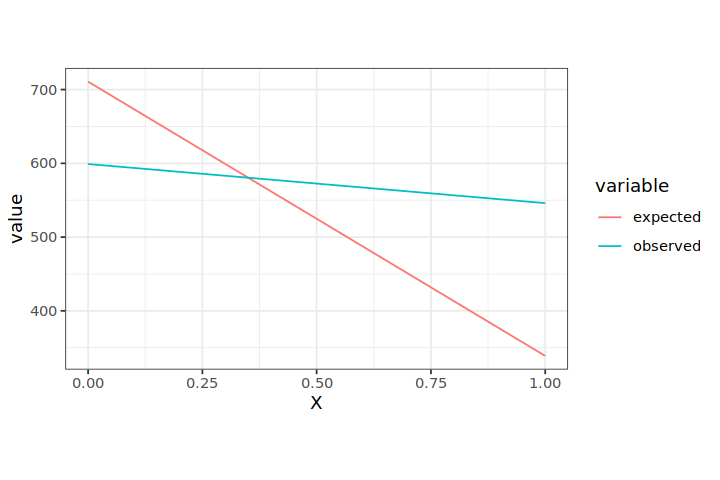

[1] "num_pass_sample 1395"
[1] "lambda:  0.749820788530466"
  X Poisson_probability expected observed
1 0           0.4724512 659.0694      599
2 1           0.3542537 494.1840      546
3 2           0.1328134 185.2747      250
[1] "sum of the prob:  0.959518365497434"
[1] 3.253823e-07


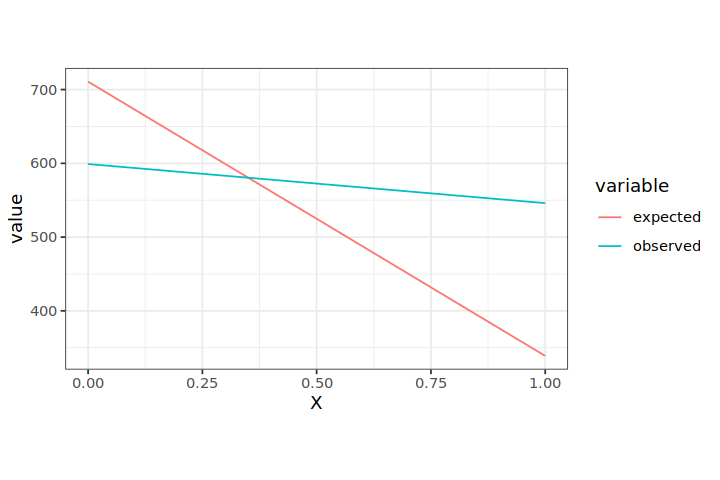

[1] "num_pass_sample 1395"
[1] "lambda:  0.749820788530466"
  X Poisson_probability expected observed
1 0           0.4724512 659.0694      599
2 1           0.3542537 494.1840      546
3 2           0.1328134 185.2747      250
[1] "sum of the prob:  0.959518365497434"
[1] 3.253823e-07


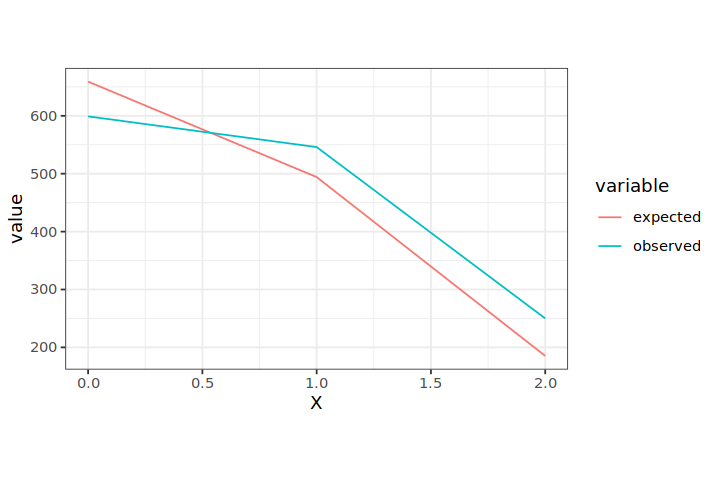

[1] "num_pass_sample 1472"
[1] "lambda:  0.867527173913043"
  X Poisson_probability  expected observed
1 0          0.41998883 618.22355      599
2 1          0.36435172 536.32573      546
3 2          0.15804251 232.63857      250
4 3          0.04570206  67.27343       77
[1] "sum of the prob:  0.988085109860136"
[1] 0.3583842


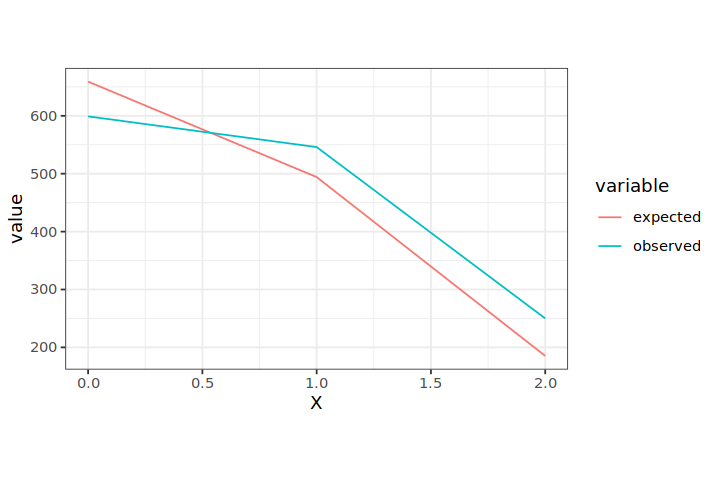

[1] "num_pass_sample 1472"
[1] "lambda:  0.867527173913043"
  X Poisson_probability  expected observed
1 0          0.41998883 618.22355      599
2 1          0.36435172 536.32573      546
3 2          0.15804251 232.63857      250
4 3          0.04570206  67.27343       77
[1] "sum of the prob:  0.988085109860136"
[1] 0.3583842


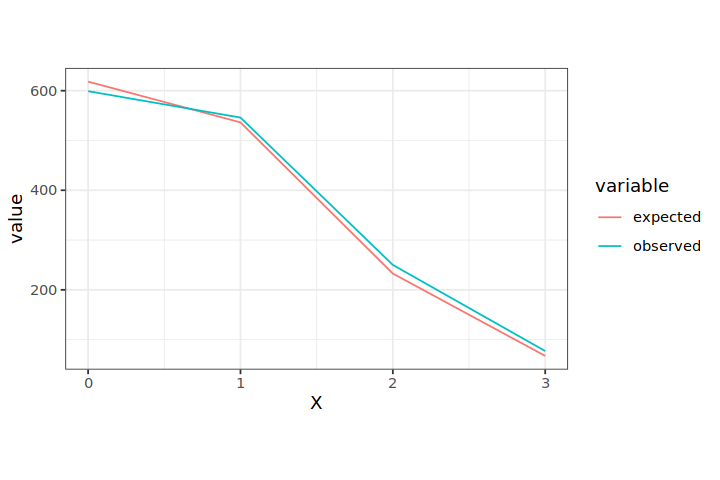

[1] "num_pass_sample 1488"
[1] "lambda:  0.901209677419355"
  X Poisson_probability  expected observed
1 0          0.40607814 604.24427      599
2 1          0.36596155 544.55078      546
3 2          0.16490404 245.37722      250
4 3          0.04953771  73.71211       77
5 4          0.01116097  16.60752       16
[1] "sum of the prob:  0.997642404322117"
[1] 0.9900485


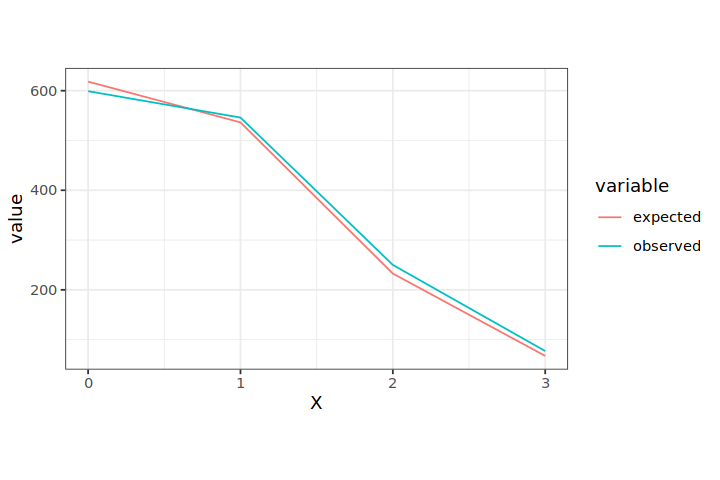

[1] "num_pass_sample 1488"
[1] "lambda:  0.901209677419355"
  X Poisson_probability  expected observed
1 0          0.40607814 604.24427      599
2 1          0.36596155 544.55078      546
3 2          0.16490404 245.37722      250
4 3          0.04953771  73.71211       77
5 4          0.01116097  16.60752       16
[1] "sum of the prob:  0.997642404322117"
[1] 0.9900485
[1] "num_pass_sample 1494"
[1] "lambda:  0.917670682730924"
  X Poisson_probability   expected observed
1 0         0.399448400 596.775910      599
2 1         0.366562086 547.643757      546
3 2         0.168191640 251.278310      250
4 3         0.051448179  76.863579       77
5 4         0.011803121  17.633863       16
6 5         0.002166276   3.236416        6
[1] "sum of the prob:  0.999619702679266"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


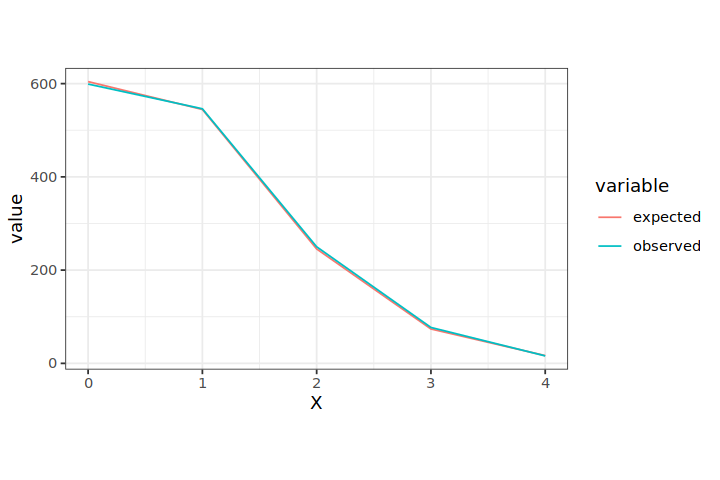

[1] 0.7719694
[1] "num_pass_sample 1494"
[1] "lambda:  0.917670682730924"
  X Poisson_probability   expected observed
1 0         0.399448400 596.775910      599
2 1         0.366562086 547.643757      546
3 2         0.168191640 251.278310      250
4 3         0.051448179  76.863579       77
5 4         0.011803121  17.633863       16
6 5         0.002166276   3.236416        6
[1] "sum of the prob:  0.999619702679266"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


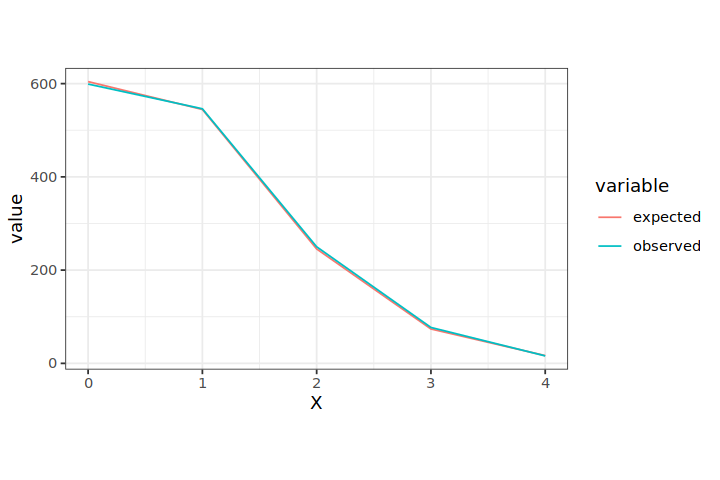

[1] 0.7719694
[1] "num_pass_sample 1496"
[1] "lambda:  0.924465240641711"
  X Poisson_probability    expected observed
1 0        0.3967435247 593.5283129      599
2 1        0.3667755980 548.6962946      546
3 2        0.1695356457 253.6253260      250
4 3        0.0522432705  78.1559327       77
5 4        0.0120742719  18.0631108       16
6 5        0.0022324489   3.3397436        6
7 6        0.0003439702   0.5145795        2
[1] "sum of the prob:  0.999948730013948"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


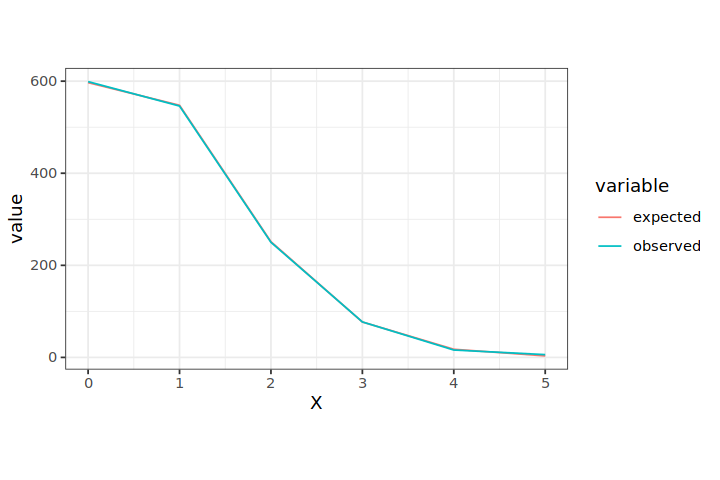

[1] 0.3421737
[1] "num_pass_sample 1496"
[1] "lambda:  0.924465240641711"
  X Poisson_probability    expected observed
1 0        0.3967435247 593.5283129      599
2 1        0.3667755980 548.6962946      546
3 2        0.1695356457 253.6253260      250
4 3        0.0522432705  78.1559327       77
5 4        0.0120742719  18.0631108       16
6 5        0.0022324489   3.3397436        6
7 6        0.0003439702   0.5145795        2
[1] "sum of the prob:  0.999948730013948"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


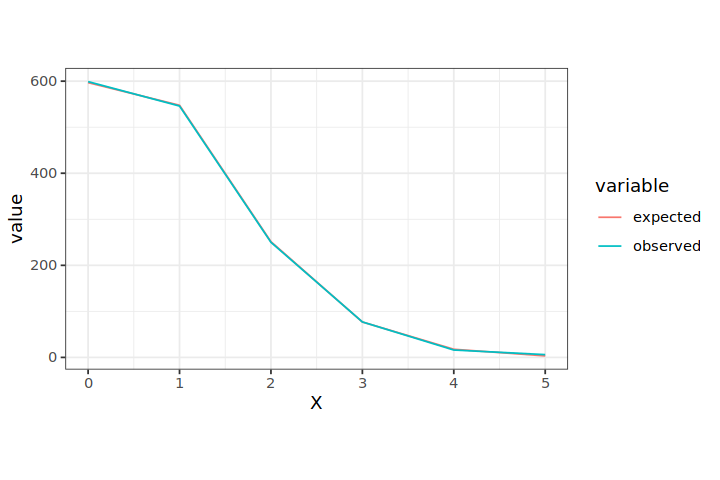

[1] 0.3421737
[1] "num_pass_sample 1496"
[1] "lambda:  0.924465240641711"
  X Poisson_probability     expected observed
1 0        3.967435e-01 593.52831291      599
2 1        3.667756e-01 548.69629462      546
3 2        1.695356e-01 253.62532602      250
4 3        5.224327e-02  78.15593268       77
5 4        1.207427e-02  18.06311078       16
6 5        2.232449e-03   3.33974361        6
7 6        3.439702e-04   0.51457948        2
8 7        4.542693e-05   0.06795869        0
[1] "sum of the prob:  0.999994156947"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


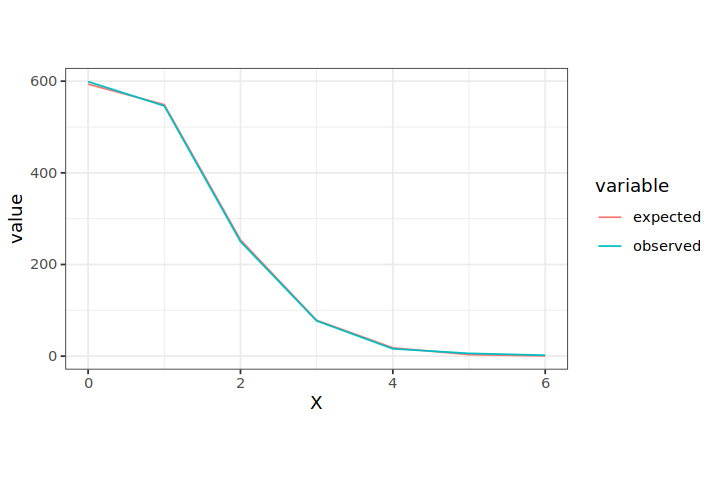

[1] 0.4453971
[1] "num_pass_sample 1496"
[1] "lambda:  0.924465240641711"
  X Poisson_probability     expected observed
1 0        3.967435e-01 593.52831291      599
2 1        3.667756e-01 548.69629462      546
3 2        1.695356e-01 253.62532602      250
4 3        5.224327e-02  78.15593268       77
5 4        1.207427e-02  18.06311078       16
6 5        2.232449e-03   3.33974361        6
7 6        3.439702e-04   0.51457948        2
8 7        4.542693e-05   0.06795869        0
[1] "sum of the prob:  0.999994156947"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


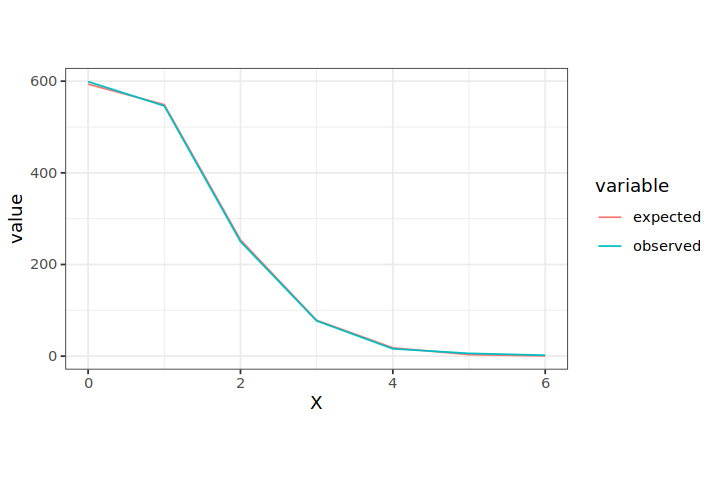

[1] 0.4453971
[1] "num_pass_sample 1497"
[1] "lambda:  0.929191716766867"
  X Poisson_probability     expected observed
1 0        3.948728e-01 5.911245e+02      599
2 1        3.669125e-01 5.492680e+02      546
3 2        1.704660e-01 2.551876e+02      250
4 3        5.279854e-02 7.903941e+01       77
5 4        1.226499e-02 1.836069e+01       16
6 5        2.279306e-03 3.412121e+00        6
7 6        3.529853e-04 5.284190e-01        2
8 7        4.685586e-05 7.014323e-02        0
9 8        5.442260e-06 8.147063e-03        1
[1] "sum of the prob:  0.999999381134813"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


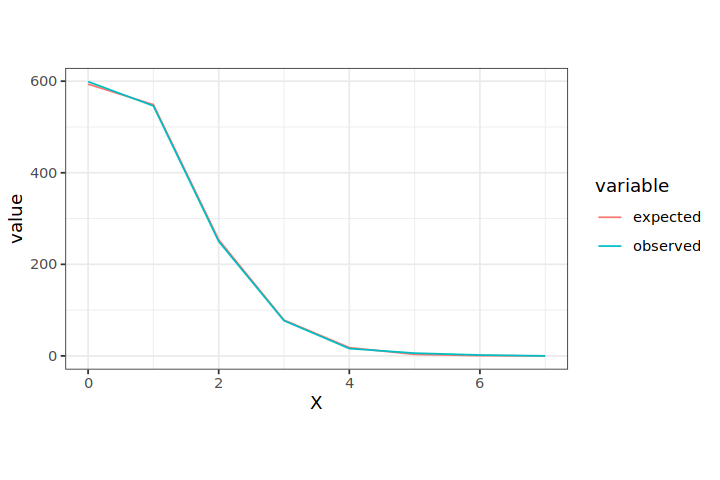

[1] 9.464289e-24
[1] "num_pass_sample 1497"
[1] "lambda:  0.929191716766867"
  X Poisson_probability     expected observed
1 0        3.948728e-01 5.911245e+02      599
2 1        3.669125e-01 5.492680e+02      546
3 2        1.704660e-01 2.551876e+02      250
4 3        5.279854e-02 7.903941e+01       77
5 4        1.226499e-02 1.836069e+01       16
6 5        2.279306e-03 3.412121e+00        6
7 6        3.529853e-04 5.284190e-01        2
8 7        4.685586e-05 7.014323e-02        0
9 8        5.442260e-06 8.147063e-03        1
[1] "sum of the prob:  0.999999381134813"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


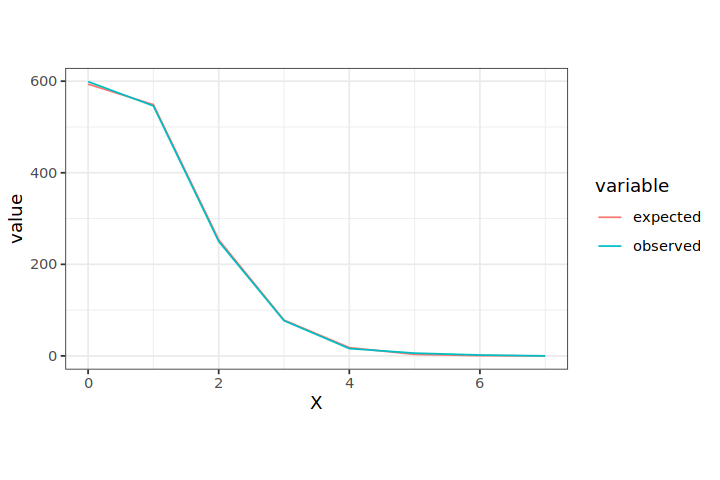

[1] 9.464289e-24
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
   X Poisson_probability     expected observed
1  0        3.927510e-01 5.883410e+02      599
2  1        3.670570e-01 5.498514e+02      546
3  2        1.715220e-01 2.569399e+02      250
4  3        5.343364e-02 8.004359e+01       77
5  4        1.248449e-02 1.870177e+01       16
6  5        2.333550e-03 3.495658e+00        6
7  6        3.634814e-04 5.444951e-01        2
8  7        4.852889e-05 7.269627e-02        0
9  8        5.669262e-06 8.492555e-03        1
10 9        5.887085e-07 8.818853e-04        1
[1] "sum of the prob:  0.999999939913869"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


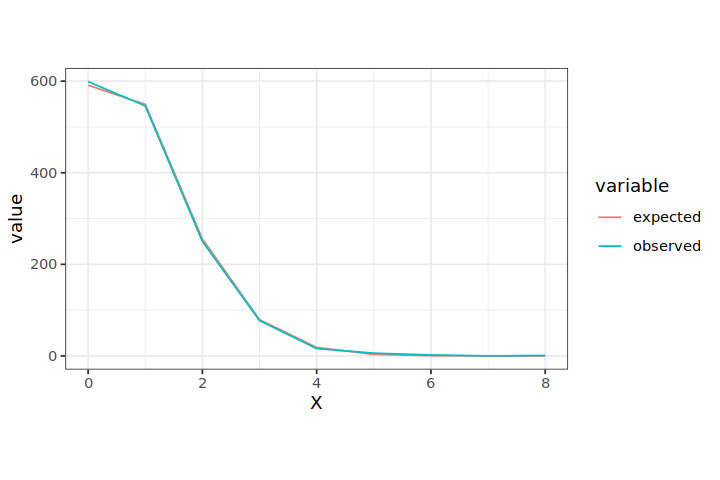

[1] 2.216966e-264
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
   X Poisson_probability     expected observed
1  0        3.927510e-01 5.883410e+02      599
2  1        3.670570e-01 5.498514e+02      546
3  2        1.715220e-01 2.569399e+02      250
4  3        5.343364e-02 8.004359e+01       77
5  4        1.248449e-02 1.870177e+01       16
6  5        2.333550e-03 3.495658e+00        6
7  6        3.634814e-04 5.444951e-01        2
8  7        4.852889e-05 7.269627e-02        0
9  8        5.669262e-06 8.492555e-03        1
10 9        5.887085e-07 8.818853e-04        1
[1] "sum of the prob:  0.999999939913869"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


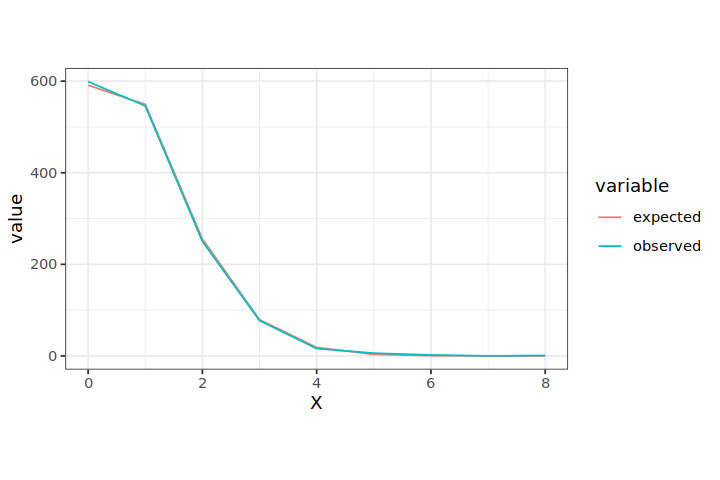

[1] 2.216966e-264
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
[1] "sum of the prob:  0.999999994933351"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


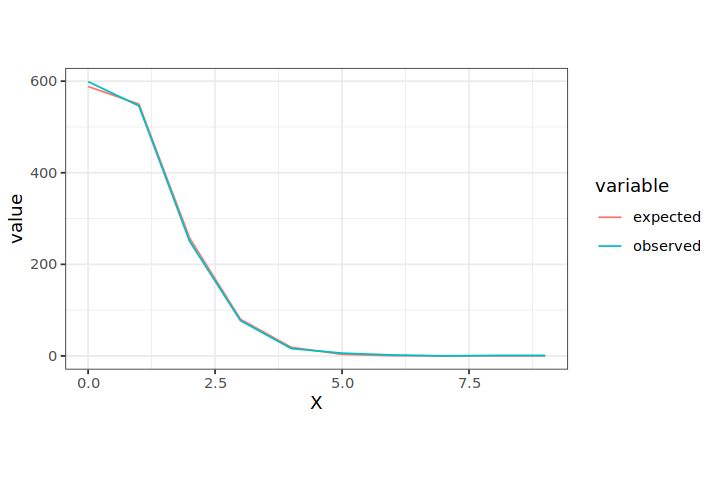

[1] 2.6928e-263
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
[1] "sum of the prob:  0.999999994933351"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


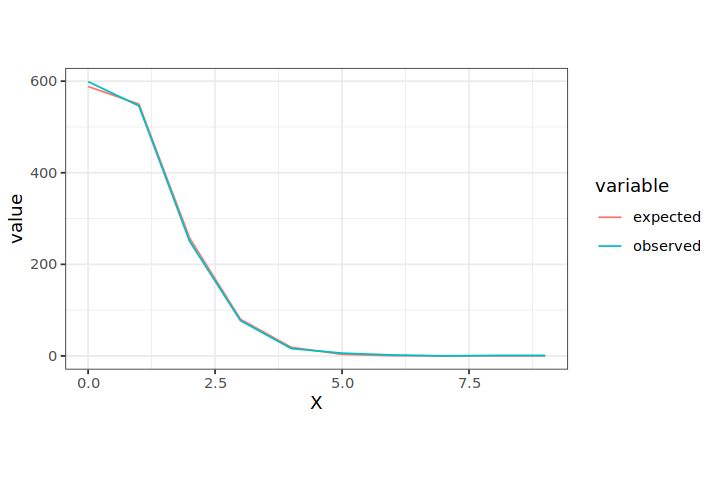

[1] 2.6928e-263
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
[1] "sum of the prob:  0.999999999607903"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


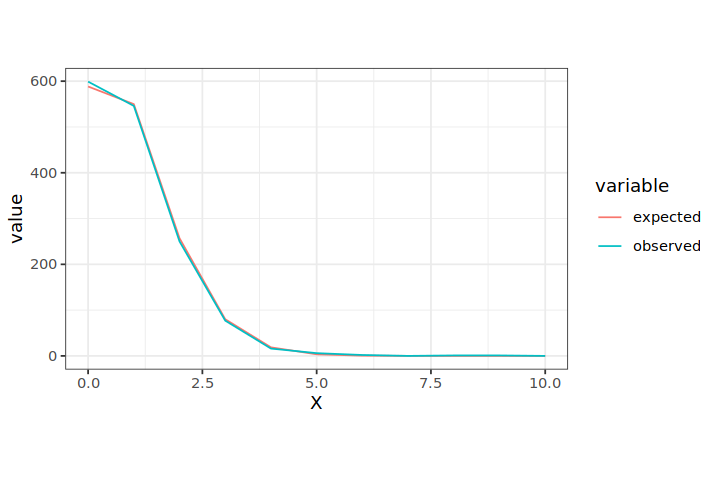

[1] 3.094574e-262
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
[1] "sum of the prob:  0.999999999607903"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


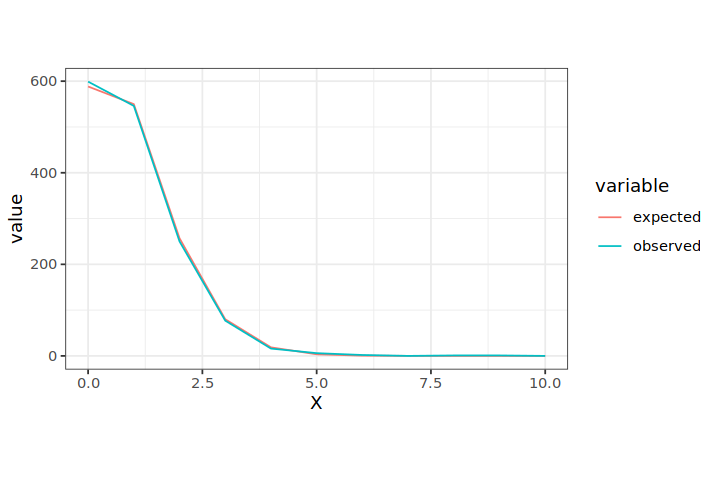

[1] 3.094574e-262
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
[1] "sum of the prob:  0.999999999971965"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


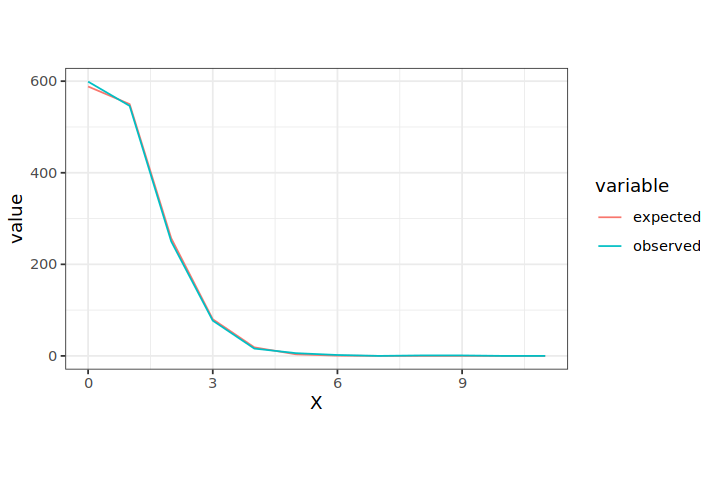

[1] 3.383152e-261
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
[1] "sum of the prob:  0.999999999971965"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


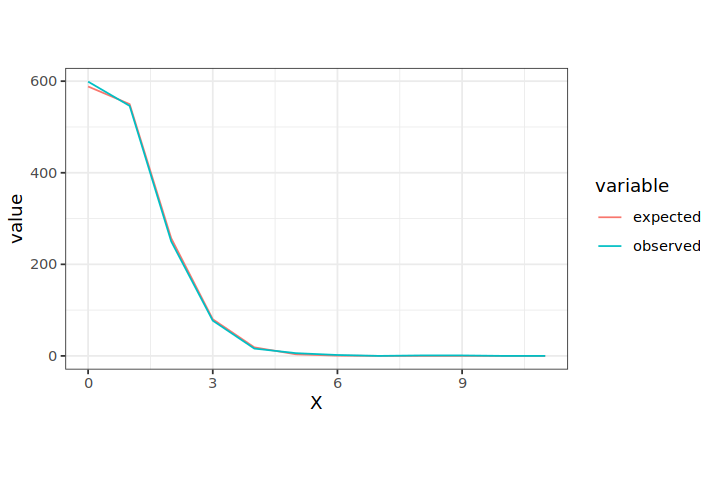

[1] 3.383152e-261
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
[1] "sum of the prob:  0.999999999998137"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


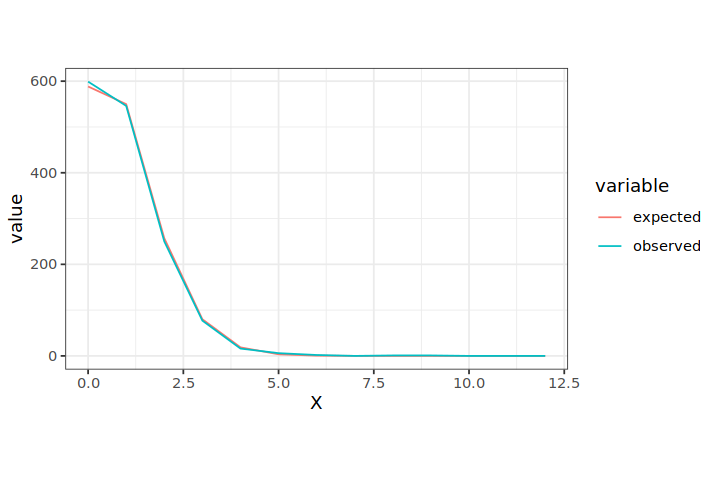

[1] 3.534507e-260
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
[1] "sum of the prob:  0.999999999998137"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


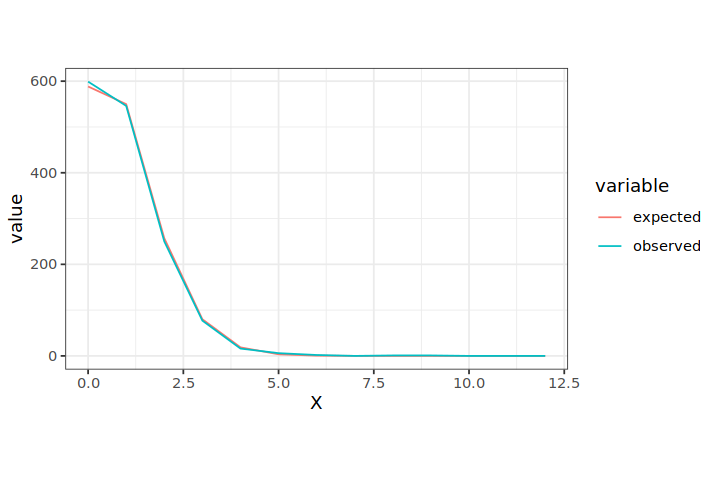

[1] 3.534507e-260
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
[1] "sum of the prob:  0.999999999999884"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


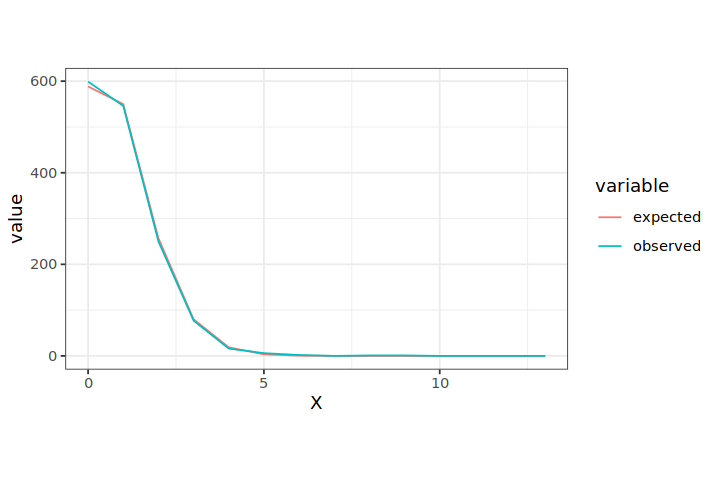

[1] 3.542107e-259
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
[1] "sum of the prob:  0.999999999999884"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


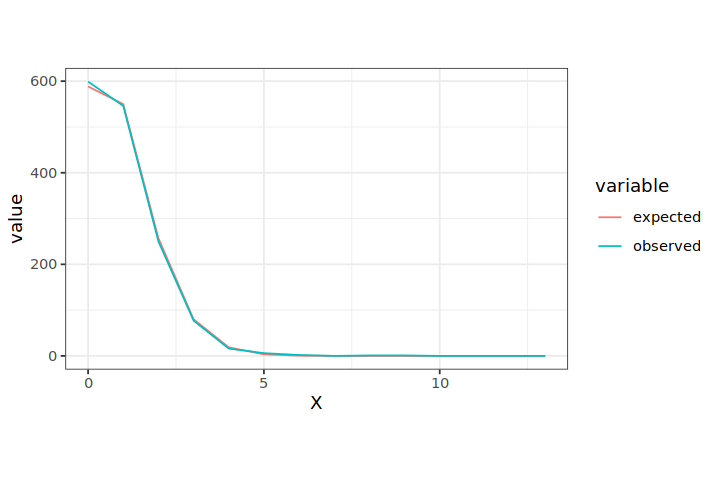

[1] 3.542107e-259
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
[1] "sum of the prob:  0.999999999999993"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


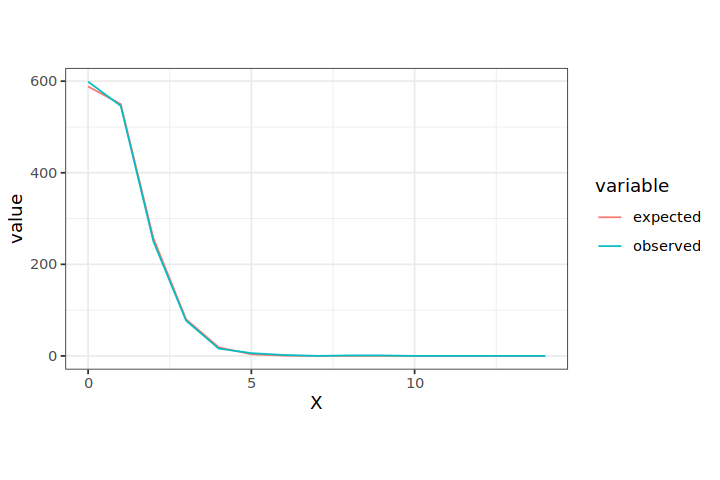

[1] 3.415918e-258
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
[1] "sum of the prob:  0.999999999999993"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


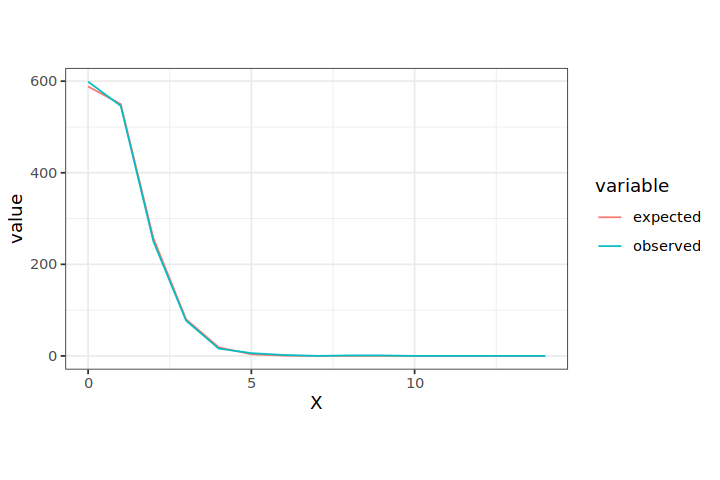

[1] 3.415918e-258
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
17 16        6.358538e-15 9.525090e-12        0
[1] "sum of the prob:  1"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


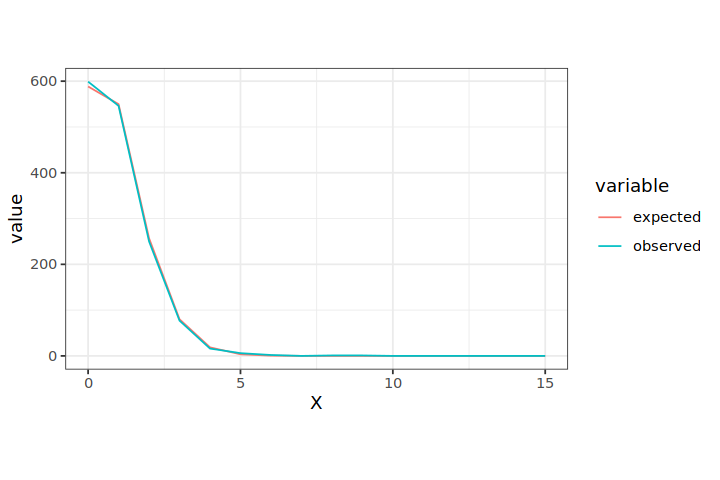

[1] 3.178748e-257
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
17 16        6.358538e-15 9.525090e-12        0
[1] "sum of the prob:  1"


Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


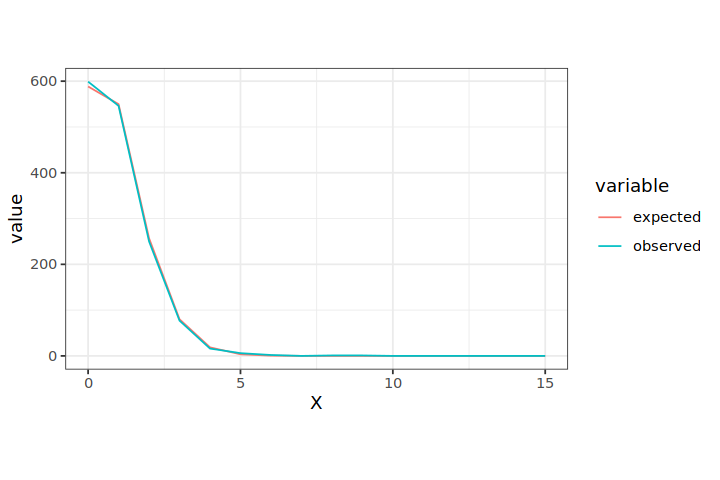

[1] 3.178748e-257
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
17 16        6.358538e-15 9.525090e-12        0
18 17        3.495623e-16 5.236443e-13        0
[1] "sum o

Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


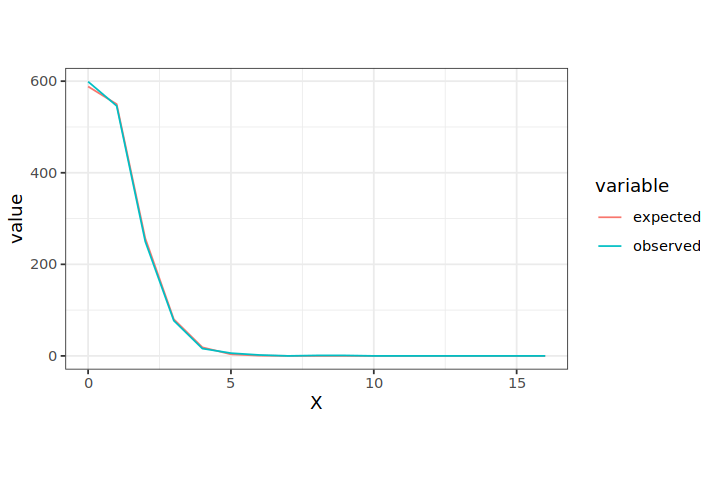

[1] 2.861141e-256
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
17 16        6.358538e-15 9.525090e-12        0
18 17        3.495623e-16 5.236443e-13        0
[1] "sum o

Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


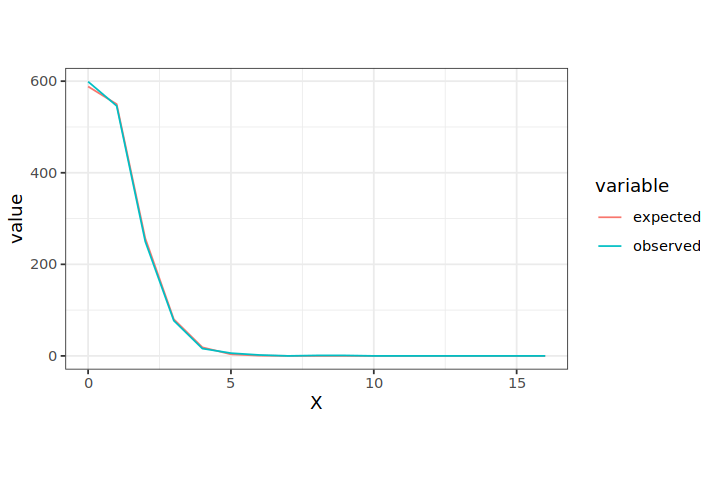

[1] 2.861141e-256
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
17 16        6.358538e-15 9.525090e-12        0
18 17        3.495623e-16 5.236443e-13        0
19 18     

Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


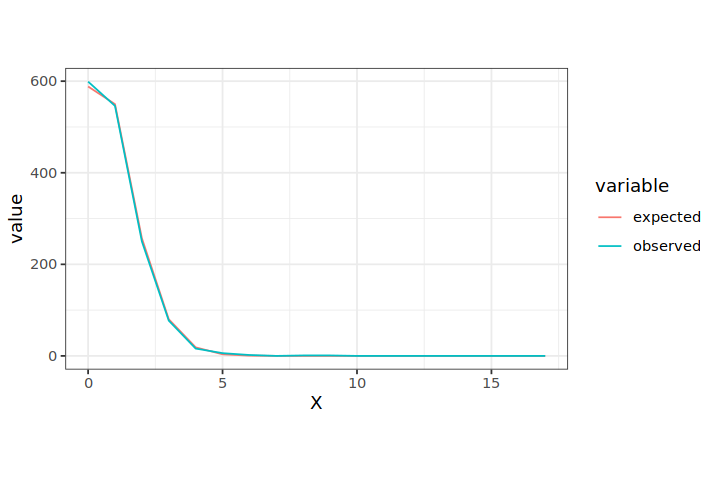

[1] 2.496088e-255
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
17 16        6.358538e-15 9.525090e-12        0
18 17        3.495623e-16 5.236443e-13        0
19 18     

Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


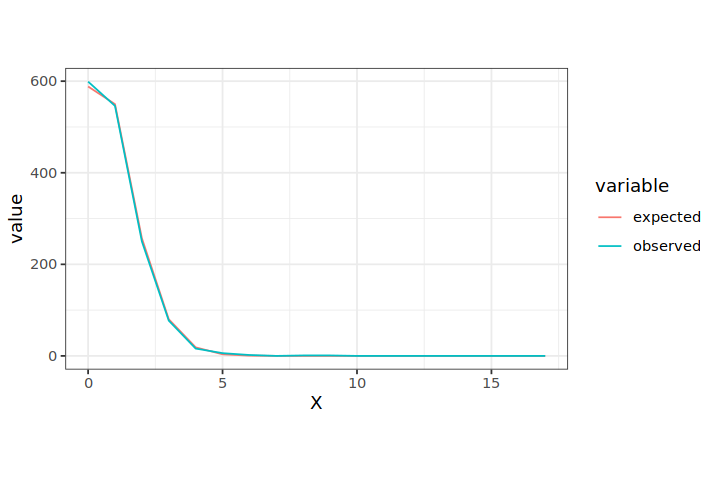

[1] 2.496088e-255
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
17 16        6.358538e-15 9.525090e-12        0
18 17        3.495623e-16 5.236443e-13        0
19 18     

Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


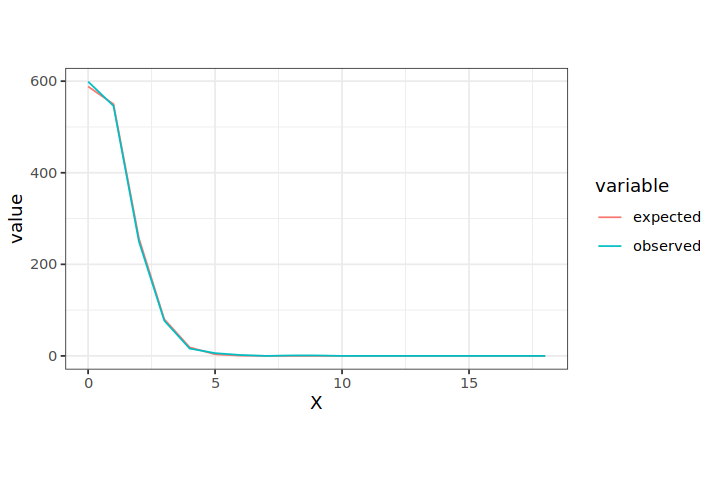

[1] 2.114534e-254
[1] "num_pass_sample 1498"
[1] "lambda:  0.934579439252336"
    X Poisson_probability     expected observed
1   0        3.927510e-01 5.883410e+02      599
2   1        3.670570e-01 5.498514e+02      546
3   2        1.715220e-01 2.569399e+02      250
4   3        5.343364e-02 8.004359e+01       77
5   4        1.248449e-02 1.870177e+01       16
6   5        2.333550e-03 3.495658e+00        6
7   6        3.634814e-04 5.444951e-01        2
8   7        4.852889e-05 7.269627e-02        0
9   8        5.669262e-06 8.492555e-03        1
10  9        5.887085e-07 8.818853e-04        1
11 10        5.501948e-08 8.241918e-05        0
12 11        4.674552e-09 7.002480e-06        0
13 12        3.640617e-10 5.453644e-07        0
14 13        2.617266e-11 3.920665e-08        0
15 14        1.747174e-12 2.617266e-09        0
16 15        1.088582e-13 1.630695e-10        0
17 16        6.358538e-15 9.525090e-12        0
18 17        3.495623e-16 5.236443e-13        0
19 18     

Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


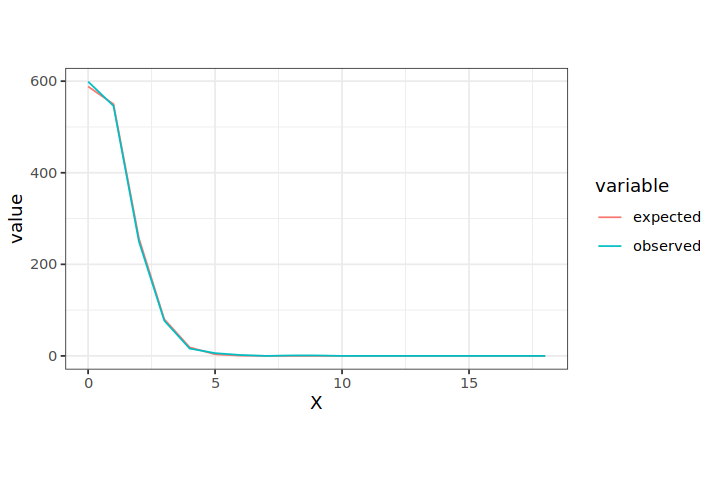

[1] 2.114534e-254
[1] "num_pass_sample 1499"
[1] "lambda:  0.9472981987992"
    X Poisson_probability     expected observed
1   0        3.877873e-01 5.812932e+02      599
2   1        3.673502e-01 5.506580e+02      546
3   2        1.739951e-01 2.608187e+02      250
4   3        5.494175e-02 8.235769e+01       77
5   4        1.301156e-02 1.950432e+01       16
6   5        2.465165e-03 3.695282e+00        6
7   6        3.892077e-04 5.834223e-01        2
8   7        5.267082e-05 7.895356e-02        0
9   8        6.236871e-06 9.349070e-03        1
10  9        6.564641e-07 9.840397e-04        1
11 10        6.218673e-08 9.321790e-05        0
12 11        5.355398e-09 8.027741e-06        0
13 12        4.227632e-10 6.337221e-07        0
14 13        3.080637e-11 4.617875e-08        0
15 14        2.084487e-12 3.124646e-09        0
16 15        1.316421e-13 1.973315e-10        0
17 16        7.794018e-15 1.168323e-11        0
18 17        4.343094e-16 6.510297e-13        0
19 18       

Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


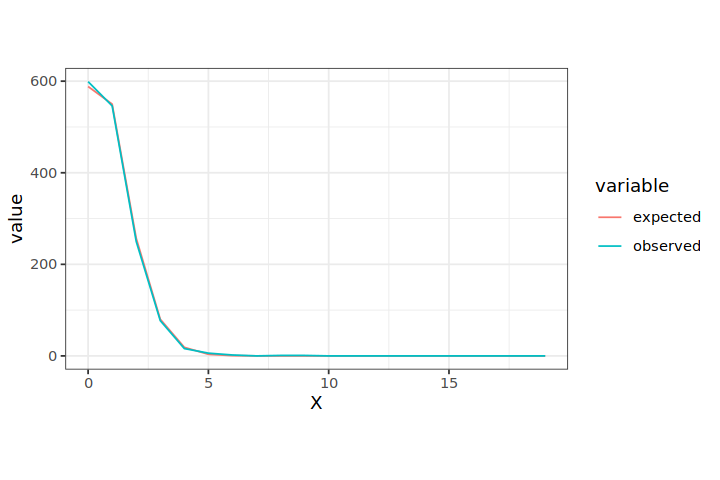

[1] 0
[1] "num_pass_sample 1499"
[1] "lambda:  0.9472981987992"
    X Poisson_probability     expected observed
1   0        3.877873e-01 5.812932e+02      599
2   1        3.673502e-01 5.506580e+02      546
3   2        1.739951e-01 2.608187e+02      250
4   3        5.494175e-02 8.235769e+01       77
5   4        1.301156e-02 1.950432e+01       16
6   5        2.465165e-03 3.695282e+00        6
7   6        3.892077e-04 5.834223e-01        2
8   7        5.267082e-05 7.895356e-02        0
9   8        6.236871e-06 9.349070e-03        1
10  9        6.564641e-07 9.840397e-04        1
11 10        6.218673e-08 9.321790e-05        0
12 11        5.355398e-09 8.027741e-06        0
13 12        4.227632e-10 6.337221e-07        0
14 13        3.080637e-11 4.617875e-08        0
15 14        2.084487e-12 3.124646e-09        0
16 15        1.316421e-13 1.973315e-10        0
17 16        7.794018e-15 1.168323e-11        0
18 17        4.343094e-16 6.510297e-13        0
19 18        2.285669e-1

Warning message in chisq.test(df_cutoff$observed, p = df_cutoff$expected, rescale.p = TRUE):
"Chi-squared approximation may be incorrect"


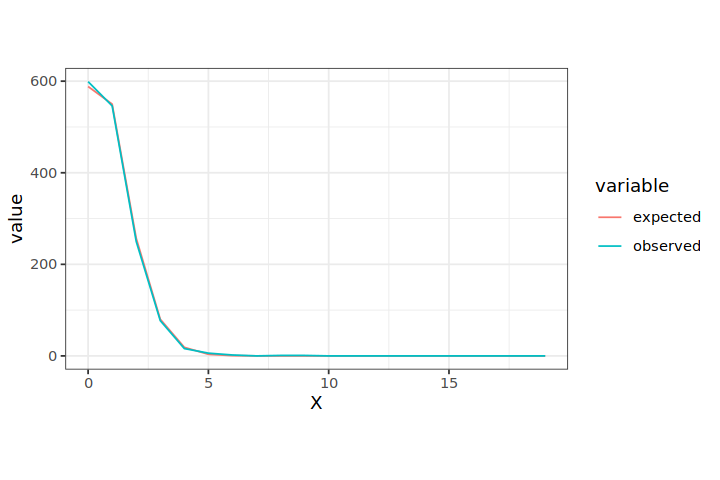

[1] 0


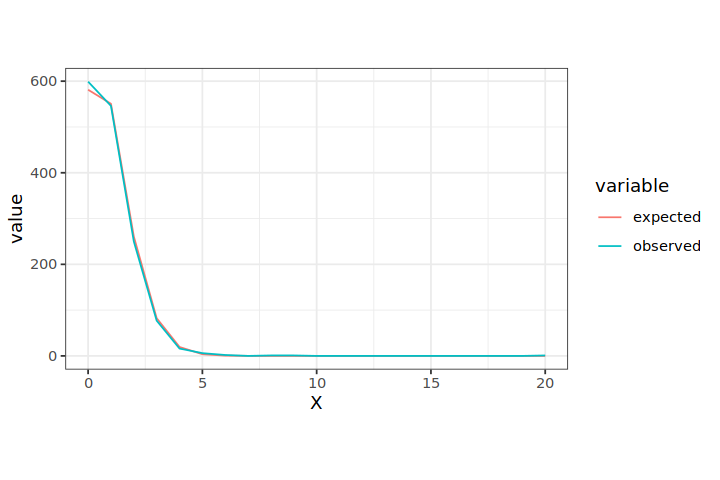

cutoff,p_value,lambda
<int>,<dbl>,<dbl>
1,7.788262e-29,0.4768559
2,3.253823e-07,0.7498208
3,3.583842e-01,0.8675272
4,9.900485e-01,0.9012097
5,7.719694e-01,0.9176707
6,3.421737e-01,0.9244652
7,4.453971e-01,0.9244652
8,9.464289e-24,0.9291917
9,2.216966e-264,0.9345794


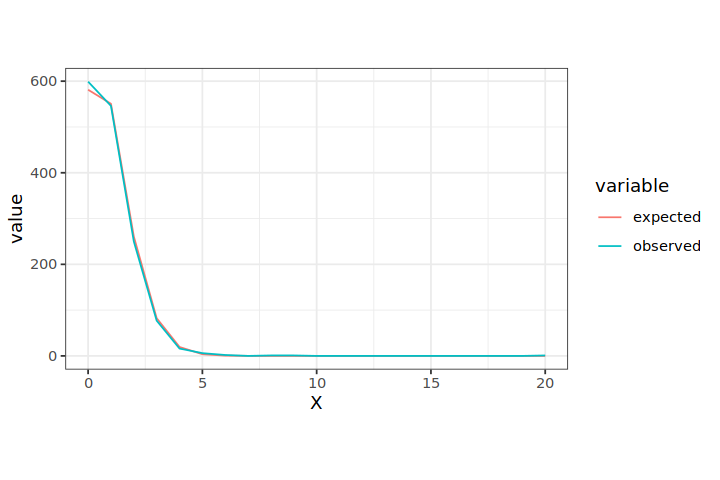

<0 x 0 matrix>

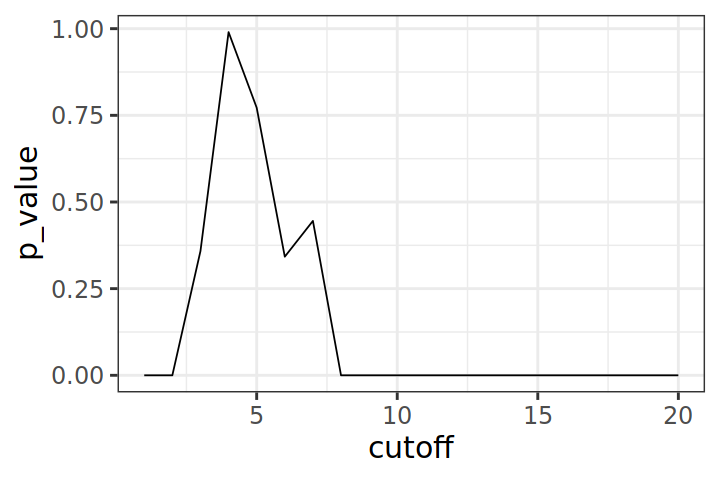

In [17]:
percent='70'


Get_pval_poisson_goodness_of_fit <- function(cutoff){
    data <- read.delim(paste("NTD_WES_DNM.FixedSample.C",percent, ".den_input", sep=""), header=TRUE)
    #data <- read.delim("/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Filteration/NTD_WES_DNM.sampFil.PF2.Insp.pu.C70.den_input", header = T)
    data.mm <- data[grepl('s', data$pro),]
    data.ssc <- data[!grepl('s', data$pro),]


    paste("cutoff for dnm: ", cutoff)

    original_sample <- table(data$pro)
    num_total_sample <- num_samp_ntd + num_samp_ssc
    paste("number of total sample: ", num_total_sample)


    paste("========================")
    paste("sample number that has de novo: ", length(original_sample))
    paste("original dnm in samples: ", dim(data)[1] )
    num_no_dnm_sample <- num_total_sample - length(original_sample)
    paste("original samples that have no dnm: ", num_no_dnm_sample )


    many_sample <-names(table(data$pro)[table(data$pro) > cutoff])
    many <-data.frame(table(data$pro)[table(data$pro) > cutoff])
    head(many)
    sum(many$Freq)
    paste("cutoff exceeding samples", length(many_sample))
    paste("cutoff exceeding dnms", sum(many$Freq))
    data.fil <- data[!(data$pro %in% many_sample),]

    df_cnt <- data.frame(table(data.fil$pro))
    head(df_cnt)


    paste("========================")
    paste("cuffoff pass sample number: ", length(table(data.fil$pro)))
    num_cutoff_dnm <-  sum(df_cnt$Freq)
    paste("cutoff pass dnm in samples: ", num_cutoff_dnm )
    paste("========================")




    num_pass_sample = num_no_dnm_sample + length(table(data.fil$pro))
    
    print (paste("num_pass_sample", num_pass_sample))
    lambda = num_cutoff_dnm / num_pass_sample
    print (paste("lambda: ", lambda))
    df_lambda <- rbind(df_lambda, c(cutoff, lambda))
    
    
    df_cutoff = data.frame()
    for_zero <- c(0, dpois(0, lambda), dpois(0, lambda)*num_pass_sample, num_no_dnm_sample)
    df_cutoff = rbind(df_cutoff, for_zero)
    for (i in 1:cutoff){
        x = i
        dpoi = dpois(i, lambda)
        
        expected = dpoi * num_pass_sample
        observed = sum(df_cnt$Freq == i)
        df_cutoff = rbind(df_cutoff, c(x, dpoi, expected, observed))

    }

    colnames(df_cutoff) = c("X", "Poisson_probability", "expected", "observed")

    print (df_cutoff)
    print (paste("sum of the prob: ", sum(df_cutoff$Poisson_probability)))
    chisq_gof = chisq.test(df_cutoff$observed, 
                           p= df_cutoff$expected, 
                           rescale.p = TRUE)
    #print(chisq_gof)
    #print(chisq_gof$p.value)
    p_chisq = chisq_gof$p.value
    print (p_chisq)
    df_melt <- melt(df_cutoff, id = "X")
    p <- ggplot(subset(df_melt, variable == 'expected' | variable == 'observed')) + 
    geom_line(aes(x=X, y= value, color = variable)) + 
    theme_bw() + 
    theme(aspect.ratio = 0.6)
    
    print (p)
    return (list(p_chisq, lambda))
}


df_pval = data.frame()
df_lambda = data.frame()

for (i in 1:20){
    pval = Get_pval_poisson_goodness_of_fit(i)[1]
    lambda = Get_pval_poisson_goodness_of_fit(i)[2]
    #print (pval)
    df_pval =rbind(df_pval, c(i,pval, lambda))
}
#Get_pval_poisson_goodness_of_fit(5)
colnames(df_pval) = c("cutoff", "p_value", "lambda")
df_pval

ggplot(data = df_pval)+
geom_line(aes(x=cutoff, y=p_value))

df_lambda




`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.905"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.095"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1.199"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"span too small.   fewer data values than degrees of freedom."
Warning message in predLoess(object$y, objec

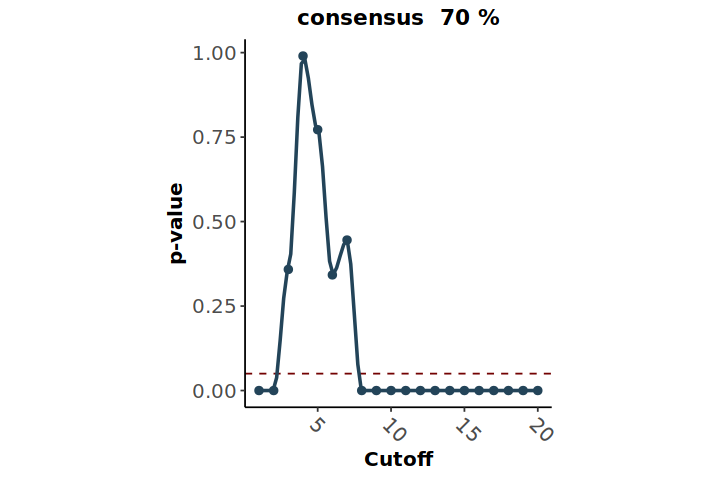

In [18]:
#df_pval

write.table(df_pval, "poisson_pvalue.txt", sep='\t', quote=F, row.names=F)

saved <- options(repr.plot.width=30, repr.plot.height=16)
options(repr.plot.width=6, repr.plot.height=4)
p<- ggplot(data = df_pval, aes(x=cutoff, y=p_value))+
geom_hline(yintercept = 0.05, linetype = 'dashed', col = '#730202')+
geom_smooth( colour = "#234459", span = 0.1)+
geom_point(color='#234459', size = 2) + 
ggtitle(paste("consensus ", percent, "%")) + 
theme_classic()+ 
theme(legend.position='bottom', 
          aspect.ratio = 1.2,
          #axis.title.y.right = element_text( angle = 90,size = 15),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12),
         plot.title = element_text(face = 'bold', size = 13, hjust = 0.5),
        axis.title = element_text(face = 'bold', size = 12)) + 
xlab("Cutoff") + 
ylab("p-value") 

#options(saved)
p
ggsave(paste("Poisson_", percent,".pdf",sep = ""),
       plot= p, width = 6, height = 4)


Saving 6.67 x 6.67 in image


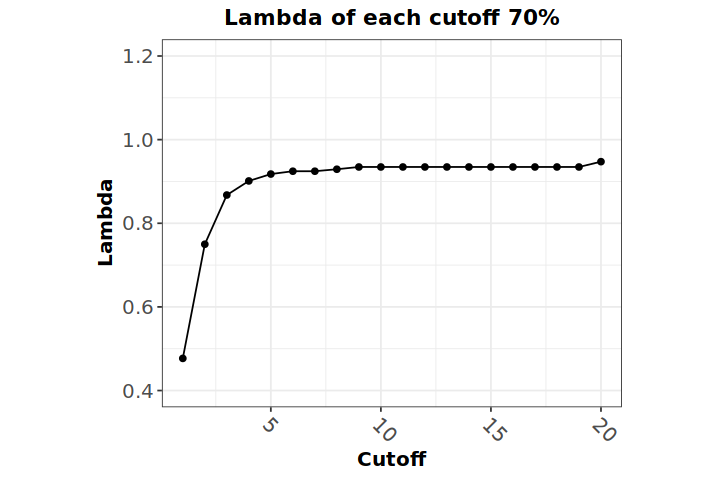

In [19]:
p <- ggplot(data = df_pval)+
geom_line(aes(x=cutoff, y=lambda)) + 
geom_point(aes(x=cutoff, y=lambda)) + 
theme_bw() + 
ylim(c(0.4,1.2)) + 
#theme_classic()+ 
theme(legend.position='bottom', 
          aspect.ratio = 0.8,
          plot.title = element_text(face = 'bold', size = 13, hjust = 0.5),
        axis.title = element_text(face = 'bold', size = 12),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12)) + 
xlab("Cutoff") + 
ylab("Lambda")+
ggtitle(label = paste("Lambda of each cutoff ", percent,"%", sep =""))
p
ggsave(paste("Lambda_", percent,".pdf",sep = ""), plot= p)

## Filter out "SAMPLES" based on # of DNM "IN" consensus

In [122]:
cutoff = 7


In [ ]:

### FOr consenssus 70% 
percent= '70'
data_poi = read.delim(paste("Filteration_samples/NTD_WES_DNM.FixedSample.C",percent, ".den_input", sep=""), header=T)

many_sample_poisson <-names(table(data_poi$pro)[table(data_poi$pro) > cutoff])
many_poisson <-data.frame(table(data_poi$pro)[table(data_poi$pro) > cutoff])
"These samples had too many dnms"

length(many_poisson$Var1)

"Too many dnms in NTD"
many_poisson.mm <- many_poisson[!grepl('s', many_poisson$Var1),]
length(many_poisson.mm$Var1)

"Too many dnms in Control"
many_poisson.ssc <- many_poisson[grepl('s', many_poisson$Var1),]
length(many_poisson.ssc$Var1)
#2590100197
many_poisson
many_sample_poisson


dim(data_poi)
"NUMBER of poisson failed samples"
length(many_sample_poisson)
data_poi <- data_poi[!(data_poi$pro %in% many_sample_poisson),]
dim(data_poi)
write.table(data_poi, paste("Filteration_samples/NTD_WES_DNM.FixedSample.C",percent, ".PoiFil.den_input", sep=""), sep='\t', quote=F, row.names=F)


In [124]:

# FOr gene analysis - DNMs in and out of the consensus region
data = read.delim("/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Filteration_samples/NTD_WES_DNM.FixedSample.den_input", sep = '\t', header=T)
dim(data)

many_sample_poisson
"NUMBER of poisson failed samples"
length(many_sample_poisson)

data <- data[!(data$pro %in% many_sample_poisson),]
dim(data)


write.table(data, "/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Filteration_samples/NTD_WES_DNM.FixedSample.PoiFil.den_input", sep='\t', quote=F, row.names=F)



[1] 3663  128

[1] "2419223363" "2590100197" "3644259853" "5593407741" "6672029182"

[1] "NUMBER of poisson failed samples"

[1] 5

[1] 2592  128

In [125]:
#Write ped
num_samp_ntd = as.numeric(dim(subset(ped.fil.proband, ped.fil.proband$batch != "SSC"))[1])
num_samp_ssc = as.numeric(dim(subset(ped.fil.proband, ped.fil.proband$batch == "SSC"))[1])

num_samp_ntd
num_samp_ssc

ped.fil.proband <- ped.fil.proband[!(ped.fil.proband$pro %in% many_sample_poisson),]
#Write Fixed sample ped
num_samp_ntd = as.numeric(dim(subset(ped.fil.proband, ped.fil.proband$batch != "SSC"))[1])
num_samp_ssc = as.numeric(dim(subset(ped.fil.proband, ped.fil.proband$batch == "SSC"))[1])

num_samp_ntd
num_samp_ssc
write.table(ped.fil.proband, "NTD_WES_DNM.FixedSample.PoiFil.ped",sep='\t', quote=F, row.names=F)

[1] 777

[1] 724

[1] 772

[1] 724